Installations

In [30]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Imports

In [31]:
import subprocess
import os
import sys
import matplotlib.pyplot as plt
from collections import namedtuple

Preparing folder

In [32]:
examples_folder_path = '../../parser/cpp/examples/'
programs_folder_path = f"{examples_folder_path}programs/"
subprocess.run(f"rm {programs_folder_path}*", shell=True)
subprocess.run(f"cd {examples_folder_path} && python3 ExamplesGenerator.py 2", shell=True)


############################################################
COMPILING 0 production_rule_0.l seed_string_0.l scalar
Done!
############################################################

############################################################
COMPILING 2 production_rule_0.l seed_string_0.l scalar
Done!
############################################################

############################################################
COMPILING 4 production_rule_0.l seed_string_0.l scalar
Done!
############################################################

############################################################
COMPILING 6 production_rule_0.l seed_string_0.l scalar
Done!
############################################################

############################################################
COMPILING 8 production_rule_0.l seed_string_0.l scalar
Done!
############################################################

############################################################
COMPILING 10 produ

CompletedProcess(args='cd ../../parser/cpp/examples/ && python3 ExamplesGenerator.py 2', returncode=0)

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

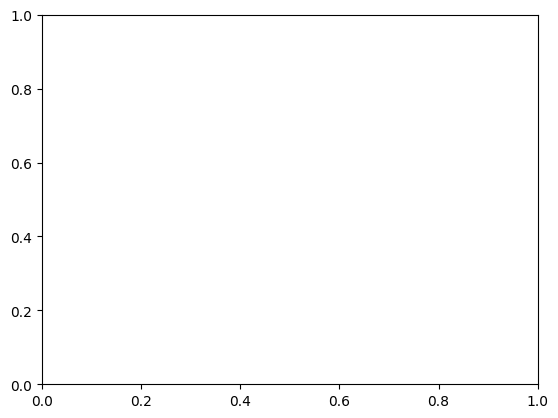

In [33]:

ProgramData = namedtuple('ProgramData', ['name', 'iterations', 'size'])
data : list[ProgramData] = []

for file in os.listdir(programs_folder_path):
    info_array = file.split('_')
    iterations = int(info_array[1])
    production_rule = int(info_array[2])
    seed_string = int(info_array[3])
    subprocess.run(f"clang -o output.o {programs_folder_path+file}", shell=True)    
    result : subprocess.CompletedProcess = subprocess.run(f"size output.o", shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print(f"Error in {file}")
        sys.exit(1)
    size_str = result.stdout.split('\n')[1].split('\t')
    size = int(size_str[0])
    data.append(ProgramData(f"PR:{production_rule}_SS:{seed_string}", iterations, size))

programs = set(item.name for item in data)
for program in programs:
    its = [item.iterations for item in data if item.name == program]
    sizes = [item.size for item in data if item.name == program]
    
    plt.plot(iterations, sizes, marker='o', label=program)

plt.xlabel('Iterations')
plt.ylabel('Size')
plt.title('Programs Size by Iteration')
plt.legend()
plt.grid(True)
plt.show()